# Data gemeenteraadsverkiezingen 2022 Nederland

Dit notebook is voor het verwerken van de data van de gemeenteraadsverkiezingen van 2022. Er zal hier stap voor stap door de data gelopen worden om het proces reproduceerbaar te maken voor latere verkiezingen. De eerste stap was de data ophalen van de bronnen, zowel de overheid als waar is mijn stemlokaal (voor geografische data van de stemlokalen). De bronnen gebruikt voor de data zijn voor de verkiezingen van 2022 is als volgt:

- [Verkiezingsuitslagen Gemeenteraad 2022](https://data.overheid.nl/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43)
  - [Directe link naar uitslagen per gemeente CSV](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_2022-03-29T15.14.zip)
  - [Directe link naar kandidatenlijst met uitslagen CSV](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_alle-kandidaten_2022-02-22T08.34.csv)
- [Waar is mijn stemlokaal stembureau data](https://waarismijnstemlokaal.nl/data)
  - [Directe link naar waar is mijn stemlokaal gemeenteraad 2022 CSV (CKAN)](https://ckan.dataplatform.nl/datastore/dump/d6a1b4c4-73c8-457b-9b75-a38428bded68)
  - [Verkiezingsuitslagen gemeenteraadsverkiezingen 2022 geodata (Volkskrant)](https://data.openstate.eu/dataset/verkiezingsuitslagen-gemeenteraadsverkiezingen-2022)
    - [Directe link naar GEOJSON bestand](https://data.openstate.eu/dataset/a1767f1b-bf0c-409b-b3b1-3af9954b57f4/resource/413be255-5070-48f4-b631-895097976abb/download/2022gr.geo.json)
- [CBS Wijk- en buurtkaart 2021](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2021)
  - [Directe link naar zip bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/wijk-en-buurtstatistieken/wijkbuurtkaart_2021_v1.zip)
- [CBS bevolkingsdichtheid kaart 100 bij 100 meter](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-100-meter-bij-100-meter-met-statistieken)
  - [Directe link naar 7z bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/100/nl_vierkant_100meter_bij_100meter.7z)
- [CBS bevolkingsdichtheid kaart 500 bij 500 meter](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-500-meter-bij-500-meter-met-statistieken)
  - [Directe link naar 7z bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/500/2021-cbs_vk500_2020_v1.zip)

De eerste stap die we moeten maken is de data importeren voor de analyse, daarna kunnen we kijken hoe goed de data is, hoe we het aan kunnen vullen, en wat er mee te doen. De makkelijkste structuur die we vonden was het geojson bestand van open state en de Volkskrant, daar staan alle stembureaus al in een lijst, en we hebben een makkelijk framework om het te importeren; geopandas. We laden deze dan ook als eerste in.

In [1]:
import pandas as pd
import geopandas as gpd

crs = {'init':'EPSG:4326'}
df_geojson = gpd.read_file(r'../data/2022gr.geo.json', crs=crs)

/home/lillian/.local/lib/python3.9/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 61
  self._schema = self.session.get_schema()
/home/lillian/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 61
  for feature in features_lst:


We importeren nu de gemeente shapefile kaart van het CBS, om de overlay van onze stemlokalen eroverheen te kunnen doen. 

<AxesSubplot:>

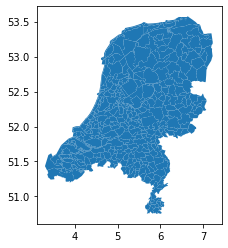

In [2]:
nl_map = gpd.read_file(r'../data/shape/Netherlands_shapefile/gemeente_2021_v1.shp')
nl_map.to_crs(epsg=4326).plot()


In [29]:
nl_map

GM_CODE            GM_NAAM  H2O       OAD      STED  BEV_DICHTH  AANT_INW  \
0    GM0034             Almere   JA -99999999 -99999999   -99999999 -99999999   
1    GM0050           Zeewolde   JA -99999999 -99999999   -99999999 -99999999   
2    GM0060            Ameland   JA -99999999 -99999999   -99999999 -99999999   
3    GM0072          Harlingen   JA -99999999 -99999999   -99999999 -99999999   
4    GM0088    Schiermonnikoog   JA -99999999 -99999999   -99999999 -99999999   
..      ...                ...  ...       ...       ...         ...       ...   
430  GM1966       Het Hogeland  NEE       414         5          99     47834   
431  GM1969     Westerkwartier  NEE       476         5         176     63678   
432  GM1970  Noardeast-Fryslân  NEE       463         5         120     45481   
433  GM1978        Molenlanden  NEE       393         5         243     44130   
434  GM1979          Eemsdelta  NEE       692         4         170     45587   

     AANT_MAN  AANT_VROUW  P_00_14_JR  ...  P_TURKIJE  P_OVER_NW   OPP_TOT  \
0   -99999999   -99999999   -99999999  ...  -99999999  -99999999 -99999999   
1   -99999999   -99999999   -99999999  ...  -99999999  -99999999 -99999999   
2   -99999999   -99999999   -99999999  ...  -99999999  -99999999 -99999999   
3   -99999999   -99999999   -99999999  ...  -99999999  -99999999 -99999999   
4   -99999999   -99999999   -99999999  ...  -99999999  -99999999 -99999999   
..        ...         ...         ...  ...        ...        ...       ...   
430     24052       23782          15  ...          0          3     90308   
431     32034       31644          17  ...          0          3     36887   
432     22879       22602          17  ...          0          2     51645   
433     22317       21813          18  ...          0          2     19158   
434     22841       22746          14  ...          2          5     36407   

     OPP_LAND  OPP_WATER  JRSTATCODE  JAAR     Shape_Leng    Shape_Area  \
0   -99999999  -99999999  2021GM0034  2021  122665.358635  1.095623e+08   
1   -99999999  -99999999  2021GM0050  2021   83290.773617  1.633050e+07   
2   -99999999  -99999999  2021GM0060  2021  156406.894023  2.085914e+08   
3   -99999999  -99999999  2021GM0072  2021  104274.683035  3.618323e+08   
4   -99999999  -99999999  2021GM0088  2021  152568.858991  1.624101e+08   
..        ...        ...         ...   ...            ...           ...   
430     48249      42059  2021GM1966  2021  321301.166576  4.875998e+08   
431     36269        618  2021GM1969  2021   99030.762281  3.688457e+08   
432     37783      13862  2021GM1970  2021  238426.959926  3.837930e+08   
433     18173        986  2021GM1978  2021   88570.376691  1.915841e+08   
434     26789       9618  2021GM1979  2021  173966.493452  2.727771e+08   

                                              geometry  
0    MULTIPOLYGON (((150213.998 479503.726, 150087....  
1    MULTIPOLYGON (((170588.413 486792.192, 170570....  
2    POLYGON ((196000.000 610000.000, 196000.000 60...  
3    MULTIPOLYGON (((158392.775 580357.500, 158387....  
4    POLYGON ((219000.000 616567.418, 219000.000 61...  
..                                                 ...  
430  MULTIPOLYGON (((217037.735 601967.991, 217043....  
431  POLYGON ((215186.661 595044.495, 215190.788 59...  
432  MULTIPOLYGON (((207769.575 603284.528, 207773....  
433  POLYGON ((123569.533 440132.167, 123576.153 44...  
434  MULTIPOLYGON (((269190.000 594253.046, 269190....  

[435 rows x 38 columns]

<AxesSubplot:>

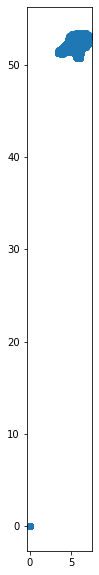

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson.plot(ax=ax)

We hebben hier een probleem dat sommige punten de coördinaten 0,0 hebben, dit is niet iets wat we willen weergeven. Laten we eerst kijken waarom dit het geval is in de data voordat we het er helemaal uithalen.

In [4]:
for index, row in df_geojson.iterrows():
    if (row.geometry.centroid.x == 0.00000):
        print(row)

Stembureau                                                            32
Adres                                                                   
Locatie                                                             SB32
description                               Stembureau Mobiel Stembureau 1
Geldige stemmen                                                       99
                                                       ...              
"Leefbaar 's-Hertogenbosch" Paul Kagie                               NaN
RAADSGROEPERING ''BOSCH-BELANG''                                     NaN
gewoon ge-DREVEN                                                     NaN
VOOR Den Bosch Joep Gersjes                                          NaN
geometry                                                     POINT (0 0)
Name: 2520, Length: 973, dtype: object
Stembureau                                                            33
Adres                                                                   
Locatie     

Het zijn dus duidelijk allemaal mobiele stembureaus, die kunnen we in een aparte dataset houden voor later, voor nu zijn ze onbelangrijk voor de kaartweergave, laten we de dataset dus opsplitsen in drie dataframes, de originele, één frame zonder de mobiele stembureaus, en de mobiele stembureaus alleen.

In [5]:
#de waarschuwing over de projectie die niet klopt kan genegeerd worden, we zoeken naar data die x = 0 is, de projectie gaat geen effect hebben op die data in Nederland
#filter de data en print welke waardes 0 hebben op x
mobiel_mask = df_geojson['geometry'].centroid.x == 0
i = 0
for item in mobiel_mask:
    if item:
        print(i)
    i = i + 1

/tmp/ipykernel_58008/291552514.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mobiel_mask = df_geojson['geometry'].centroid.x == 0


2520
2521
2918
3579
3580
3581
3582
3583
5494
5784
5785
6260
6261
6738
6739
6863
7348
7364
7857
7912
7913
7923
7924
7926
7958
7959
7960
8108
8109
8161
8162
8163
8318
9093
9151
9152
9153
9661
9853
10427
10431
10497
10498
10525
10526
10527
10528
10623
10624
10894
10895
11032
11101
12038
12039
12053
12054
12118
12119
12120
12121
12504
12505
12506


In [6]:
df_geojson_clean = df_geojson[~mobiel_mask]
df_geojson_mobiel = df_geojson[mobiel_mask]
print(df_geojson_clean)

       Stembureau   Adres Locatie  \
0               1  9461BH     SB1   
1               2  9461DA     SB2   
2               3  9461JA     SB3   
3               4  9451KD     SB4   
4               6  9454PL     SB6   
...           ...     ...     ...   
12591         703  5391AR   SB703   
12592         705  5391AR   SB705   
12593         750  5382KE   SB750   
12594         751  5382KE   SB751   
12595         752  5283KE   SB752   

                                             description  Geldige stemmen  \
0      Stembureau Gemeentehuis Gieten (postcode: 9461...              784   
1              Stembureau OBS Gieten (postcode: 9461 DA)              562   
2      Stembureau Zorgcentrum Dekelhem (postcode: 946...              566   
3      Stembureau Ontmoetingscentrum Boerhorn Rolde (...             1495   
4      Stembureau Dropshuis de Eekhof (postcode: 9454...              347   
...                                                  ...              ...   
12591  Stemburea

<AxesSubplot:>

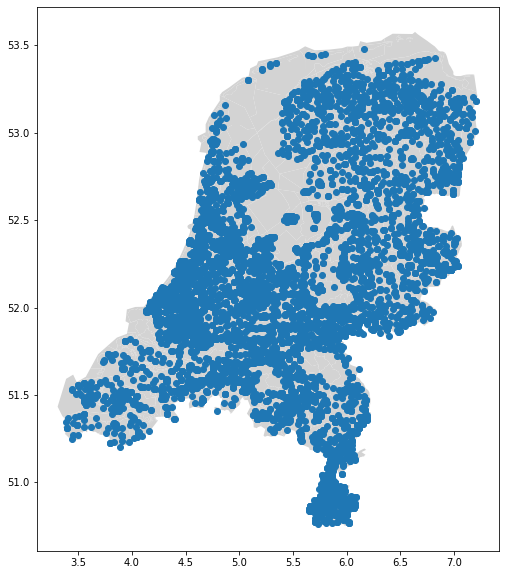

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson_clean.plot(ax=ax)

Nu we een mooie kaart hebben van nederland met de stemlokalen erop, kunnen we gaan kijken naar hoe dit verhoud met de bevolkingsdichtheid als eerste voorbeeld. De kaart is opgehaald van het CBS, eerst gaan we kijken hoe de kaart er op zichzelf met dezelfde projectie uitziet.

<AxesSubplot:>

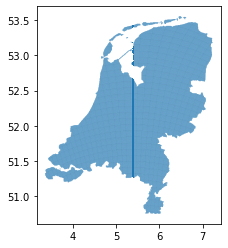

In [8]:
nl_map_cbs = gpd.read_file(r'../data/shape/Netherlands_shapefile/CBS_vk500_2020_v1.shp')
nl_map_cbs.to_crs(epsg=4326).plot()

Het verwerken van de 500m bij 500m vierkanten kaar duurde heel lang (langer dan een half uur) op de laptop, en is dus niet ideaal tenzij we dit niveau van detail écht nodig hebben. Er is namelijk nog een andere kaart met dezelfde gegevens beschikbaar, maar met een grid van 500 bij 500 meter in plaats van 100 bij 100. Laten we dus kijken hoe vaak een stemlokaal dichterbij dan 100 meter van de dichtstbijzijnde andere is. De makkelijkste manier om dat te doen zonder alle punten met alle andere te vergelijken (heel veel moeite), is een extra dataframe maken als een kopie, alle indexen 1 opschuiven (want alle stemlokalen zijn al in een volgorde van clustering), en dan de laagste afstand bekijken.

In [9]:
df_shifted = df_geojson_clean.to_crs('EPSG:28992')

df_shifted['geometry (shifted)'] = df_shifted['geometry'].shift(periods=1)
df_shifted['distance'] = df_shifted['geometry'].distance(df_shifted['geometry (shifted)'])
df_shifted.sort_values(['distance'], inplace=True, ascending=True)
zero_mask_booth = df_shifted['distance'] == 0.000000
df_shifted = df_shifted[~zero_mask_booth]
print(df_shifted['distance'])

11165         0.002608
1021          0.004853
3196          0.004875
1923          2.693202
3757          3.609362
             ...      
7444     253385.654588
9711     263408.187856
4392     266925.200994
9297     271954.076837
0                  NaN
Name: distance, Length: 11670, dtype: float64


We kunnen dus vaststellen dat afstanden van onder de 500 meter waarschijnlijk zeldzaam zijn, en we verder kunnen gaan met de 500 meter bij 500 meter kaart. Laten we nu dus een projectie proberen te maken met de bevolkingsdichtheid erop om het te vergelijken met de stemlokalen en hun posities en clustering.

In [10]:
print(list(nl_map_cbs))
nl_map_dst = nl_map_cbs.drop(columns=['MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'P_NL_ACHTG', 'P_WE_MIG_A', 'P_NW_MIG_A', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD', 'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564', 'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524', 'WON_MRGEZ', 'P_KOOPWON', 'P_HUURWON', 'WON_HCORP', 'WON_NBEW', 'WOZWONING', 'UITKMINAOW', 'OAD', 'STED'])
zero_mask_pop = nl_map_dst['INWONER'] == -99997
nl_map_dst = nl_map_dst[~zero_mask_pop]
nl_map_dst

['c28992r500', 'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'P_NL_ACHTG', 'P_WE_MIG_A', 'P_NW_MIG_A', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD', 'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564', 'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524', 'WON_MRGEZ', 'P_KOOPWON', 'P_HUURWON', 'WON_HCORP', 'WON_NBEW', 'WOZWONING', 'UITKMINAOW', 'OAD', 'STED', 'geometry']


c28992r500  INWONER                                           geometry
267     E2050N6110        5  POLYGON ((205000.000 611500.000, 205500.000 61...
269     E2060N6110       15  POLYGON ((206000.000 611500.000, 206500.000 61...
292     E2055N6105       20  POLYGON ((205500.000 611000.000, 206000.000 61...
293     E2060N6105      185  POLYGON ((206000.000 611000.000, 206500.000 61...
294     E2065N6105      340  POLYGON ((206500.000 611000.000, 207000.000 61...
...            ...      ...                                                ...
151071  E1970N3075       10  POLYGON ((197000.000 308000.000, 197500.000 30...
151073  E1980N3075       90  POLYGON ((198000.000 308000.000, 198500.000 30...
151074  E1985N3075       15  POLYGON ((198500.000 308000.000, 199000.000 30...
151100  E1980N3070        5  POLYGON ((198000.000 307500.000, 198500.000 30...
151106  E1920N3065       20  POLYGON ((192000.000 307000.000, 192500.000 30...

[70656 rows x 3 columns]

In [47]:
import folium
from folium import plugins

map = folium.Map(location = [52.155, 5.3875], zoom_start = 9, tiles="cartodbdark_matter", prefer_canvas=True)

nl_map_dst.to_crs(epsg=4326)
#Make sure the index is a string so folium can read it correctly as a key.
nl_map_dst['c28992r500'] = nl_map_dst['c28992r500'].apply(lambda x: str(x))

folium.Choropleth(
    geo_data = nl_map_dst,
    name="Bevolkingsdichtheid",
    data = nl_map_dst,
    columns = ["c28992r500", "INWONER"],
    key_on = 'feature.properties.c28992r500',
    fill_color = 'RdPu',
    nan_fill_color= 'white',
    fill_opacity = 0.7,
    nan_fill_opacity = 0.7,
    line_opacity = 0,
    legend_name = 'Bevolkingsdichtheid',
    smooth_factor = 1.0,
    show=False
).add_to(map)

# Renders the map to an HTML file and displays it in an embed.
def embed_map(m):
    #from IPython.display import IFrame
    m.save('index.html')
    #return IFrame('index.html', width='100%', height='750px')

In [48]:
df_geojson_clean_hmp = [[point.xy[1][0], point.xy[0][0]] for point in df_geojson_clean.geometry]

plugins.HeatMap(df_geojson_clean_hmp, name="Stemlokalen Heatmap").add_to(map)

folium.LayerControl().add_to(map)



embed_map(map)




In [11]:
nl_map_dst_points = nl_map_dst
nl_map_dst_points['geometry'] = nl_map_dst_points['geometry'].centroid
nl_map_dst_points.head()

c28992r500  INWONER                       geometry
267  E2050N6110        5  POINT (205250.000 611250.000)
269  E2060N6110       15  POINT (206250.000 611250.000)
292  E2055N6105       20  POINT (205750.000 610750.000)
293  E2060N6105      185  POINT (206250.000 610750.000)
294  E2065N6105      340  POINT (206750.000 610750.000)

<AxesSubplot:ylabel='Frequency'>

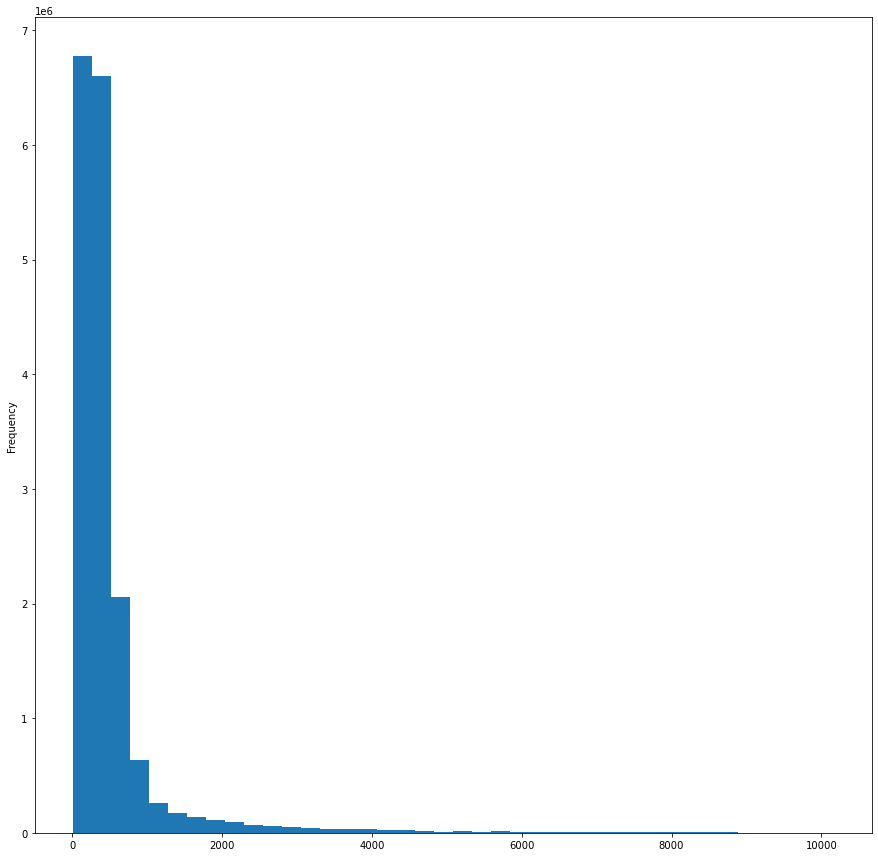

In [17]:
import numpy as np

from scipy.spatial import cKDTree
from shapely.geometry import Point

def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

#error bar is +- sqrt(250²*2)m ≈ +-353.553390593m
df_nearest = ckdnearest(nl_map_dst_points.to_crs(epsg=28992), df_geojson_clean.to_crs(epsg=28992))

#ax = df_nearest.plot.bar(x='INWONER', y='dist')
df_nearest['dist'].plot(kind="hist", bins=40, weights=df_nearest['INWONER'], figsize=(15,15))

In [13]:
df_wims = pd.read_csv(r'../data/wims.csv')
print(df_wims)
dfwims.

SyntaxError: invalid syntax (745234620.py, line 3)

In [ ]:
#de eerste vijf rijen zijn meta-data en kunnen we gerust weghalen voor nu 
df_gr_gr = pd.read_csv(r'../data/stemmen/01_Groningen/osv4-3_telling_gr2022_groningen.csv', skiprows=5, header=None, delimiter=';')
print(df_gr_gr)


De data is heel gecompliceerd, dus we moeten het bruikbaar maken in pandas. Met hoe de data eruit ziet in een CSV in libre office willen we een constructie maken van de verschillende onderdelen. We hebben de data van de stemlokalen apart al, die kunnen we dus negeren. We willen de data van de lijsten apart hebben. 

TODO:mobiele stemlokalen eruit filteren die NIET 0,0 zijn
TODO:gooi dichtheid data van niet verkiezingsgemeente weg
TODO:datastandaard duitse verkiezingen stemlokaalafstand opzoeken